# Train Test Split <a id="toc"></a>

Thus far we've simply been fitting models to data and calculating the error between various models and the actual data. This can lead to various problems such as overfitting where we overtune our models to these specific data points and fail to disern more generalizable patterns that will apply to future cases. 

Let's look at a few examples of how we could modify some of our algorithms to overfit data:

### Introduction  

Now that you've seen some basic linear regression models it's time to discuss further how to better tune these models. As you saw, we usually begin with an error or loss function for which we'll apply an optimization algorithm such as gradient descent. We then apply this optimization algorithm to the error function we're trying to minimize and voila, we have an optimized solution! Unfortunately, things aren't quite that simple. 

### Overfitting and Underfitting
Most importantly is the issue of generalization.
This is often examined by discussing underfitting and overfitting.
![](./images/overfit_underfit.png)

Recall our main goal when performing regression: we're attempting to find relationships that can generalize to new cases. Generally, the more data that we have the better off we'll be as we can observe more patterns and relationships within that data. However, some of these patterns and relationships may not generalize well to other cases. 

## Let's intentionally overfit some data to see this in demonstration.

### 1. Import the data and define X and Y.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
#Import the Data here.
path = './data/' #The subdirectory where the file is stored
filename = 'movie_data_detailed.xlsx' #The filename
full_path = path + filename #Alternative shortcut

df = pd.read_excel(full_path)

#Subset the Data into appropriate X and Y features. (X should be multiple features!)
X = df[['budget','imdbRating','Metascore', 'imdbVotes']]
Y = df.domgross

In [115]:
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,NaN,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,NaN,2012.0,NaN,NaN,NaN
2,20000000,53107035,12 Years a Slave,NaN,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,NaN,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,NaN,2013.0,7.5,62.0,74170.0


### 2. For each feature in X, create several new columns that are powers of that feature. For example, you could take the $budget$ column and produce another column $budget**2$, a third column $budget**3$, a fourth column $budget**4$ and so on. Do this until you have more columns then rows.

In [116]:
#Create additional features using powers until you have more columns then rows.
for col in X.columns:
    for i in range(2,9):
        X[col + '^' + str(i)] = df[col]**i

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [117]:
X.head()

,budget,imdbRating,Metascore,imdbVotes,budget^2,budget^3,budget^4,budget^5,budget^6,budget^7,...,Metascore^6,Metascore^7,Metascore^8,imdbVotes^2,imdbVotes^3,imdbVotes^4,imdbVotes^5,imdbVotes^6,imdbVotes^7,imdbVotes^8
0,13000000,6.8,48.0,206513.0,169000000000000,1837455228563357696,7709348267145822208,-2014449779416760320,-695152414046552064,4752128837666471936,...,1.223059e+10,5.870683e+11,2.817928e+13,4.264762e+10,8.807288e+15,1.818819e+21,3.756099e+26,7.756832e+31,1.601887e+37,3.308104e+42
1,45658735,NaN,NaN,NaN,2084720081800225,482343753509876815,6805692425895418945,-7665914952072728017,-4790055578234441631,2976467425956686863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000000,8.1,96.0,537525.0,400000000000000,-5886927989945401344,-2139167968544686080,8138564178077024256,-686517468197289984,4971973988617027584,...,7.827578e+11,7.514475e+13,7.213896e+15,2.889331e+11,1.553088e+17,8.348235e+22,4.487385e+28,2.412082e+34,1.296554e+40,6.969303e+45
3,61000000,6.7,55.0,173726.0,3721000000000000,-6185826996032634880,8180391339607719936,1653973855015796736,4480145463802068992,-9094962272870072320,...,2.768064e+10,1.522435e+12,8.373394e+13,3.018072e+10,5.243176e+15,9.108760e+20,1.582429e+26,2.749090e+31,4.775884e+36,8.296952e+41
4,40000000,7.5,62.0,74170.0,1600000000000000,8244808301565444096,2666800650704125952,2179636666531053568,-7043629817207455744,-9223372036854775808,...,5.680024e+10,3.521615e+12,2.183401e+14,5.501189e+09,4.080232e+14,3.026308e+19,2.244613e+24,1.664829e+29,1.234804e+34,9.158540e+38


### 3. Use all of your new features for X. Then train a regression model using RSS as your error function and gradient descent to tune your weights. 

In [118]:
from sklearn.linear_model import LinearRegression

In [121]:
#normalize the data
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)

for col in X.columns:
    X[col] = norm(X[col])


#fill nas
X = X.fillna(value=0)

X.head()

,budget,imdbRating,Metascore,imdbVotes,budget^2,budget^3,budget^4,budget^5,budget^6,budget^7,...,Metascore^6,Metascore^7,Metascore^8,imdbVotes^2,imdbVotes^3,imdbVotes^4,imdbVotes^5,imdbVotes^6,imdbVotes^7,imdbVotes^8
0,0.034169,0.59375,0.294118,0.357377,0.002742,0.911708,0.676558,0.163473,0.040657,0.727652,...,0.015019,0.007634,0.003854,0.146117,0.056640,0.021784,0.008370,0.003216,1.235495e-03,4.746678e-04
1,0.182956,0.00000,0.000000,0.000000,0.040606,0.991723,0.732602,0.483374,0.280154,0.829417,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
2,0.066059,1.00000,1.000000,1.000000,0.007308,0.278593,0.143302,0.632940,0.040152,0.715053,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
3,0.252847,0.56250,0.397059,0.293724,0.072947,0.296241,0.647344,1.000000,0.816859,0.464043,...,0.034769,0.020084,0.011556,0.102894,0.033689,0.010908,0.003526,0.001140,3.683518e-04,1.190499e-04
4,0.157175,0.81250,0.500000,0.100447,0.031026,0.533378,0.989293,0.970245,0.411958,0.471403,...,0.071993,0.046693,0.030216,0.017329,0.002555,0.000359,0.000050,0.000007,9.521531e-07,1.314034e-07


In [122]:
ols = LinearRegression()
model = ols.fit(X,Y)

In [123]:
model.coef_

array([ 5.53431200e+08,  2.14038816e+13, -7.87815610e+11, -9.54576200e+10,
       -3.43694386e+07,  1.24553332e+08, -8.94814620e+07,  1.61438459e+08,
       -1.04449176e+08,  1.03508919e+08,  2.32012150e+08, -7.38521373e+13,
        6.45148227e+13,  3.78813422e+13, -5.76427566e+13, -4.14806724e+13,
        7.51555688e+13, -2.59808508e+13,  5.32597200e+12, -1.50302530e+13,
        2.07795123e+13, -1.07040769e+13, -5.80385919e+12,  9.31646101e+12,
       -3.09439672e+12,  1.16151171e+12, -6.59450580e+12,  2.06142794e+13,
       -3.72437947e+13,  3.86482824e+13, -2.13554127e+13,  4.86446909e+12])

In [124]:
df['model']=model.predict(X)

### 4. Plot the model and the actual data on the Budget/Gross Domestic Product plane. (Remember this is just a slice of your n-dimensional space!)

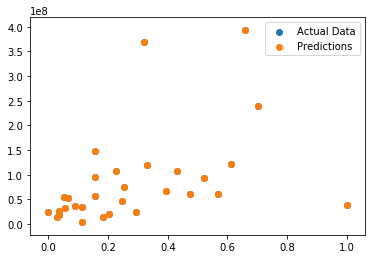

In [125]:
plt.scatter(X.budget, Y, label = "Actual Data")
plt.scatter(X.budget, df.model, label = 'Predictions')
plt.legend()

In [132]:
df['residual'] = df.model - df.domgross
df['percent_error'] = df.residual / df.domgross
df[['domgross', 'model', 'residual', 'percent_error']].head()

,domgross,model,residual,percent_error
0,25682380,2.568238e+07,0.017442,6.791306e-10
1,13414714,1.341471e+07,0.007947,5.924379e-10
2,53107035,5.310704e+07,0.007552,1.422050e-10
3,75612460,7.561246e+07,0.006404,8.469008e-11
4,95020213,9.502021e+07,0.013919,1.464896e-10


In [135]:
def rss(y,y_hat):
    return sum((y_hat - y)**2)

rss(df.domgross,df.model)

0.007401278492775276

### 5. What do you notice?

##### THE DATA IS EXACTLY THE SAME AS THE PREDICTIONS, LIKELY DUE TO OVERFITTING

Note: This box (like all the questions and headers) is formatted in Markdown. See a brief cheat sheet of [markdown syntax here](https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf)!

## Train Test Split

Here lies the theoretical underpinnings for train test split. Essentially, we are trying to gauge the generalization error of our currently tuned model to future cases. (After all, that's the value of predictive models; to predict fturue states or occurences! By initially dividing our data into one set that we will optimize and train our models on, and a second hold out set that we later verify our models on but never tune them against, we can better judge how well our models will generalize to future cases outside of the scope of current observations.

### 6. Split your data (including all of those feature engineered columns) into two sets; train and test. In other words, instead of simply X and respective Y datasets, you will now have 4 subsets: X_train, y_train, X_test, and y_test.

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

### 7. Train your model on the train set. [As before use RSS and gradient descent, but only use the training data.]

In [128]:
ols_train = LinearRegression()
model_train = ols_train.fit(X_train,y_train)
model_train.score(X_train,y_train)

1.0

### 8. Evaluate your model on the test set.

In [130]:
model_train.score(X_test,y_test)

-175.70786741204623

## Bonus:   
### Iterate over training size sets from 5%-95% of the total sample size and calculate both the training error (minimized rss) and the test error (rss) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph. 

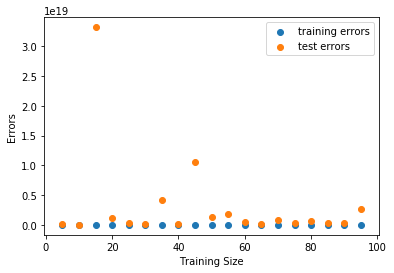

In [180]:
train_errs = []
test_errs = []

for i in range(5,100,5):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=i/100)
    
    ols_train = LinearRegression()
    model_train = ols_train.fit(X_train,y_train)
    y_hat_train = model_train.predict(X_train)
    y_hat_test = model_train.predict(X_test)
    
    train_errs.append(rss(y_train,y_hat_train))
    
    test_errs.append(rss(y_test, y_hat_test))
    
plt.scatter(range(5,100,5),train_errs,label='training errors')
plt.scatter(range(5,100,5),test_errs,label='test errors')
plt.xlabel('Training Size')
plt.ylabel('Errors')
plt.legend()
    